In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv("transaction_data.csv")
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [3]:
### print the shape of df
df.shape

(1083818, 8)

In [4]:
## check for duplicate
df.duplicated().value_counts()


True     547246
False    536572
dtype: int64

In [5]:
### means approx half of data are duplicate so we must remove it

In [6]:
df=df.drop_duplicates().reset_index(drop=True)

In [7]:
### checking for nill value
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           1454
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

## Cleaning data

In [8]:
### as no of null value row is very less compare to df size so we can drop it
df.dropna(inplace=True)
df.reset_index(drop=True)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
535113,-1,6345240,Mon Jan 28 11:23:00 IST 2019,487116,VINTAGE LEAF MAGNETIC NOTEPAD,3,4.55,United Kingdom
535114,342636,6268328,Tue Dec 18 09:48:00 IST 2018,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
535115,374577,6277348,Sun Dec 23 10:34:00 IST 2018,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom
535116,378861,5973099,Mon Apr 16 09:11:00 IST 2018,469707,CHILDRENS APRON SPACEBOY DESIGN,12,2.70,United Kingdom


In [9]:
## costperitem can't be negative
df=df[df["CostPerItem"]>0]

In [10]:
df.shape

(534060, 8)

### removing some outliner

In [11]:
df[["CostPerItem","NumberOfItemsPurchased"]].describe()

,CostPerItem,NumberOfItemsPurchased
count,5.340600e+05,534060.000000
mean,9.662346e+00,29.752618
std,2.324851e+03,649.398192
min,1.000000e-02,-242985.000000
25%,1.730000e+00,3.000000
50%,2.900000e+00,9.000000
75%,5.700000e+00,30.000000
max,1.696285e+06,242985.000000


In [12]:
df=df[df["CostPerItem"]<15000]

#### outliner by cost per unit item

In [13]:
df.groupby("ItemDescription").mean().CostPerItem.sort_values(ascending=False)[:8]

ItemDescription
AMAZON FEE                            7015.670000
PICNIC BASKET WICKER 60 PIECES         896.310000
CRUK Commission                        684.263750
Manual                                 432.421196
DOTCOM POSTAGE                         402.590099
Bank Charges                           279.943514
REGENCY MIRROR WITH SHUTTERS           215.871429
RUSTIC  SEVENTEEN DRAWER SIDEBOARD     215.327586
Name: CostPerItem, dtype: float64

In [14]:
#1.Amazon fee
print(df[df["ItemDescription"]=="AMAZON FEE"].shape)
df[df["ItemDescription"]=="AMAZON FEE"].head()
###we will drop all row containing Amazon fee bcoz its is fee by amzon which is not important for sales analysis"""

(26, 8)


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
2062,-1,6138407,Wed Sep 05 08:33:00 IST 2018,-1,AMAZON FEE,-3,6257.26,United Kingdom
29001,-1,6309050,Sat Jan 12 09:32:00 IST 2019,-1,AMAZON FEE,-3,3015.36,United Kingdom
31770,-1,5914117,Fri Feb 18 11:41:00 IST 2028,-1,AMAZON FEE,-3,7616.57,United Kingdom
38040,-1,6207740,Mon Nov 05 10:50:00 IST 2018,-1,AMAZON FEE,-3,6248.16,United Kingdom
54754,-1,6235779,Tue Nov 27 09:50:00 IST 2018,-1,AMAZON FEE,-3,7620.56,United Kingdom


In [15]:
#2.CRUK Commission
print(df[df["ItemDescription"]=="CRUK Commission"].shape)
df[df["ItemDescription"]=="CRUK Commission"].head()
###we will drop all row containing CRUK Commission bcoz its cancer donation made by people which is not important for sales analysis"""

(16, 8)


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
52638,296016,6212393,Sun Nov 11 06:49:00 IST 2018,-1,CRUK Commission,-3,2.21,United Kingdom
118749,296016,6275357,Sat Dec 22 13:12:00 IST 2018,-1,CRUK Commission,-3,568.45,United Kingdom
122960,296016,6261695,Sat Dec 15 05:57:00 IST 2018,-1,CRUK Commission,-3,499.00,United Kingdom
125443,296016,6360959,Mon Feb 04 09:39:00 IST 2019,-1,CRUK Commission,-3,1172.91,United Kingdom
148857,296016,6285840,Sat Dec 29 09:31:00 IST 2018,-1,CRUK Commission,-3,684.46,United Kingdom


In [16]:
#3.Manual
print(df[df["ItemDescription"]=="Manual"].shape)
df[df["ItemDescription"]=="Manual"].head()
###we will drop all row containing Manual bcoz its is unclear which type of product it is.As there is no information regarding 
## ecommerece company details. I am assuming ‘Manual’ refers to manual services affilated to purchase of other items.
##As there are significant outliers for these transactions that do not directly tie to individual product sales.


(560, 8)


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
2261,-1,6297005,Sat Jan 05 08:41:00 IST 2019,-1,Manual,-3,366.67,United Kingdom
3612,-1,6077005,Sat Jul 21 10:38:00 IST 2018,-1,Manual,-3,810.18,United Kingdom
4896,281568,6187665,Wed Oct 17 08:22:00 IST 2018,-1,Manual,-3,60.21,United Kingdom
5019,325542,6263202,Sat Dec 15 12:44:00 IST 2018,-1,Manual,3,4355.22,United Kingdom
9502,267708,5908540,Fri Feb 16 08:53:00 IST 2018,-1,Manual,3,0.58,United Kingdom


In [17]:
### similarly few more like discount

In [18]:
df=df[~((df["ItemDescription"] =="DOTCOM POSTAGE"))]
df=df[~((df["ItemDescription"] =="Manual"))]
df=df[~((df["ItemDescription"] =="CRUK Commission"))]
df=df[~((df["ItemDescription"] =="AMAZON FEE"))]
df=df[~((df["ItemDescription"] =="Discount"))]


In [19]:
df.shape

(532663, 8)

In [20]:
### here in data some NumberOfItemsPurchased is negative so here we can assumed that item is returned
df_refund=df[df["NumberOfItemsPurchased"]<0]
df_refund.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
69,300909,6015757,Tue May 29 14:14:00 IST 2018,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
135,319683,6036228,Sat Jun 16 08:28:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom
329,321531,5925150,Sat Feb 24 11:05:00 IST 2018,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom
330,260715,6165940,Sun Sep 30 08:26:00 IST 2018,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia
353,274869,6004240,Sat May 19 09:35:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,-15,15.12,United Kingdom


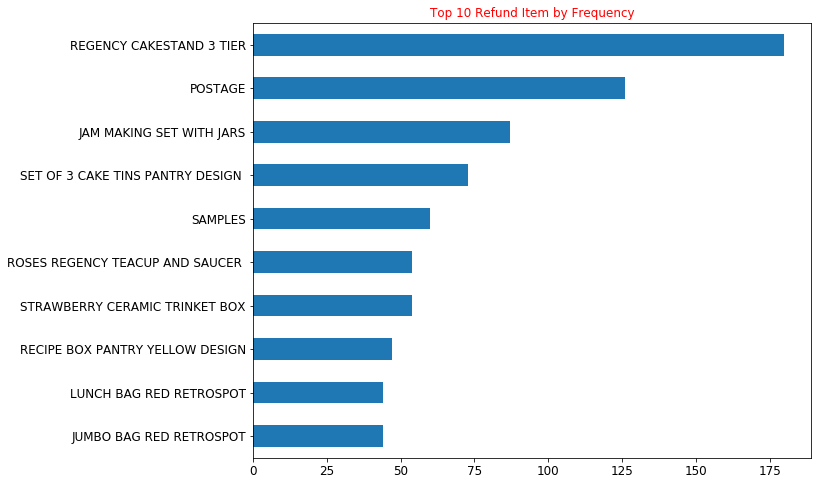

In [21]:
plt.figure(figsize=(10,8))
df_refund["ItemDescription"].value_counts()[:10].sort_values(ascending=True).plot(kind="barh")
plt.title('Top 10 Refund Item by Frequency',color="red")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


In [22]:
### lets analysize by Total cost 

df["Total_cost"]=df["NumberOfItemsPurchased"]*df["CostPerItem"]
df_refund["Total_cost"]=df_refund["NumberOfItemsPurchased"]*df["CostPerItem"]

df["Total_cost"]=df["Total_cost"].apply(lambda x:abs(x))
df_refund["Total_cost"]=df_refund["Total_cost"].apply(lambda x:abs(x))

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


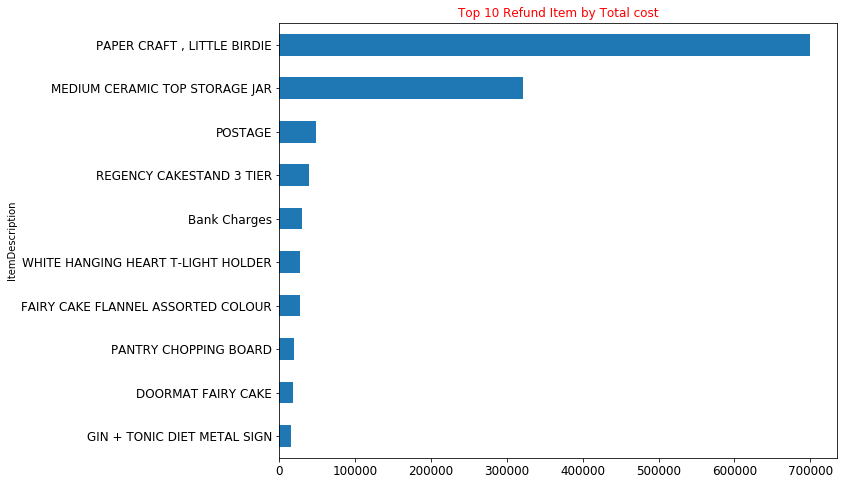

In [23]:
plt.figure(figsize=(10,8))
df_refund.groupby("ItemDescription")["Total_cost"].sum().sort_values(ascending=False)[:10].sort_values(ascending=True).plot(kind="barh")
plt.title('Top 10 Refund Item by Total cost',color="red")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


In [24]:
### now we have done with anaysising negative quantity no 
df=df[df["NumberOfItemsPurchased"]>0]

### Anaysis by time

In [25]:
#### As give in assignment this dataset is from Feb 2018 -Feb 2019
## some row have 2028 year

df[df["TransactionTime"].str[-4:]=="2028"].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Total_cost
150,-1,5914326,Fri Feb 18 14:36:00 IST 2028,446418,VICTORIAN SEWING BOX LARGE,3,35.18,United Kingdom,105.54
241,366870,5912049,Fri Feb 18 05:57:00 IST 2028,473613,PLASTERS IN TIN SKULLS,36,2.28,United Kingdom,82.08
248,-1,5914073,Fri Feb 18 11:34:00 IST 2028,464289,FULL ENGLISH BREAKFAST PLATE,3,10.52,United Kingdom,31.56
281,-1,5914326,Fri Feb 18 14:36:00 IST 2028,1764126,MAGIC TREE -PAPER FLOWERS,3,2.30,United Kingdom,6.90
500,-1,5914062,Fri Feb 18 11:33:00 IST 2028,475083,BOX OF VINTAGE JIGSAW BLOCKS,3,15.21,United Kingdom,45.63


In [26]:
### changes 2028 to 2018 as it may be misprinted

df["TransactionTime"]=df["TransactionTime"].apply(lambda x: re.sub("2028","2018",x))

In [27]:
### lets simplified some column
df["hour"]=df["TransactionTime"].str[11:13].astype("int")
df["date"]=df["TransactionTime"].str[8:10].astype("int")
df["month"]=df["TransactionTime"].str[4:7]
df["year"]=df["TransactionTime"].str[-4:].astype("int")
df["day"]=df["TransactionTime"].str[:3]


In [28]:
### we can see Dtypes of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523783 entries, 0 to 536571
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserId                  523783 non-null  int64  
 1   TransactionId           523783 non-null  int64  
 2   TransactionTime         523783 non-null  object 
 3   ItemCode                523783 non-null  int64  
 4   ItemDescription         523783 non-null  object 
 5   NumberOfItemsPurchased  523783 non-null  int64  
 6   CostPerItem             523783 non-null  float64
 7   Country                 523783 non-null  object 
 8   Total_cost              523783 non-null  float64
 9   hour                    523783 non-null  int32  
 10  date                    523783 non-null  int32  
 11  month                   523783 non-null  object 
 12  year                    523783 non-null  int32  
 13  day                     523783 non-null  object 
dtypes: float64(2), int32

### Visualization of data


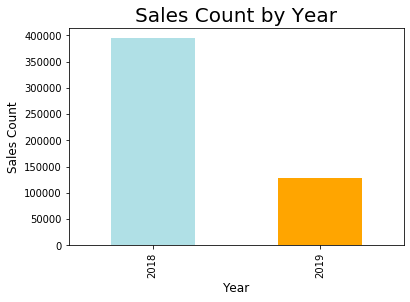

In [29]:
df['year'].value_counts().plot(kind='bar',color=["powderblue","orange"])
plt.title('Sales Count by Year',fontsize=20)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()
### we can see that difference bcoz we have only 2 month data of 2019

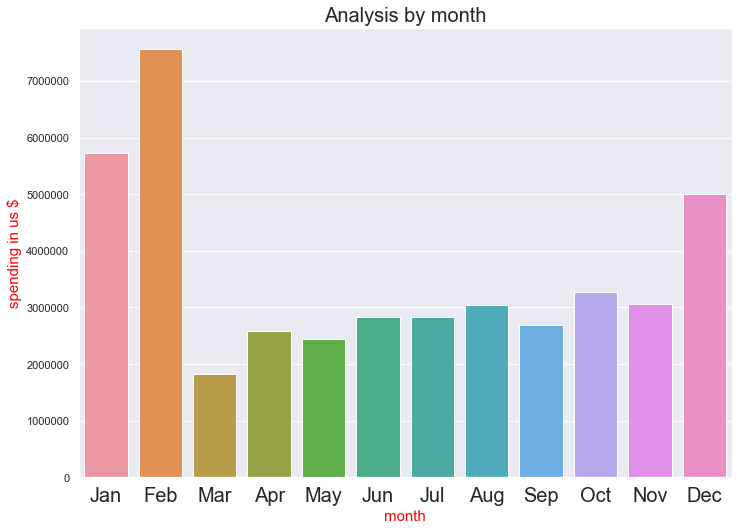

In [30]:

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x=df.groupby("month")["Total_cost"].sum().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x=x["month"], y=x["Total_cost"],  order=Months)
plt.title("Analysis by month",fontsize=20)
plt.xticks(Fontsize=20)
plt.xlabel("month",fontsize=15,color="red")
plt.ylabel("spending in us $",fontsize=15,color="red")
plt.show()

### here we can see the bar graph which showing Feb as highest spending month bcoz we have 2 year data for same month(Feb 2018,Feb 2019)

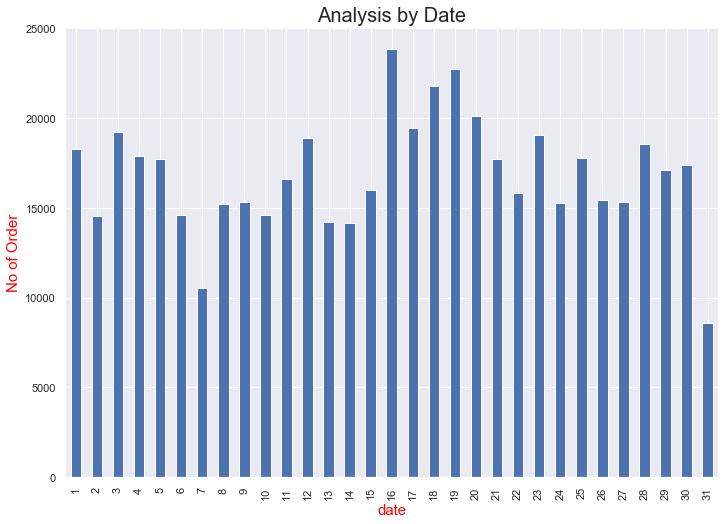

In [31]:
df.groupby("date")["date"].agg("count").plot(kind="bar")
#df.groupby("date")["Total_cost"].sum().plot(kind="bar")
plt.title("Analysis by Date",fontsize=20)
plt.ylabel("No of Order",fontsize=15,color="red")
plt.xlabel("date",fontsize=15,color="red")
plt.show()

### we can notice here that  avg 15-20 of month  receive high no of order

In [32]:
x=df.groupby("day")["day"].count()

Text(0.5, 0, 'Day')

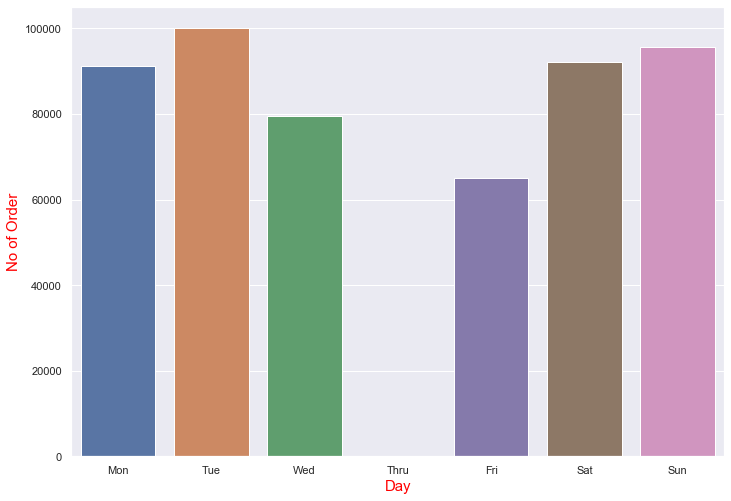

In [33]:
day=["Mon","Tue","Wed","Thru","Fri","Sat","Sun"]
sns.barplot(x=x.index,y=x,order=day)
plt.ylabel("No of Order",fontsize=15,color="red")
plt.xlabel("Day",fontsize=15,color="red")

### unfortunately  we dont have any data of Thru day ,which really surprised me  

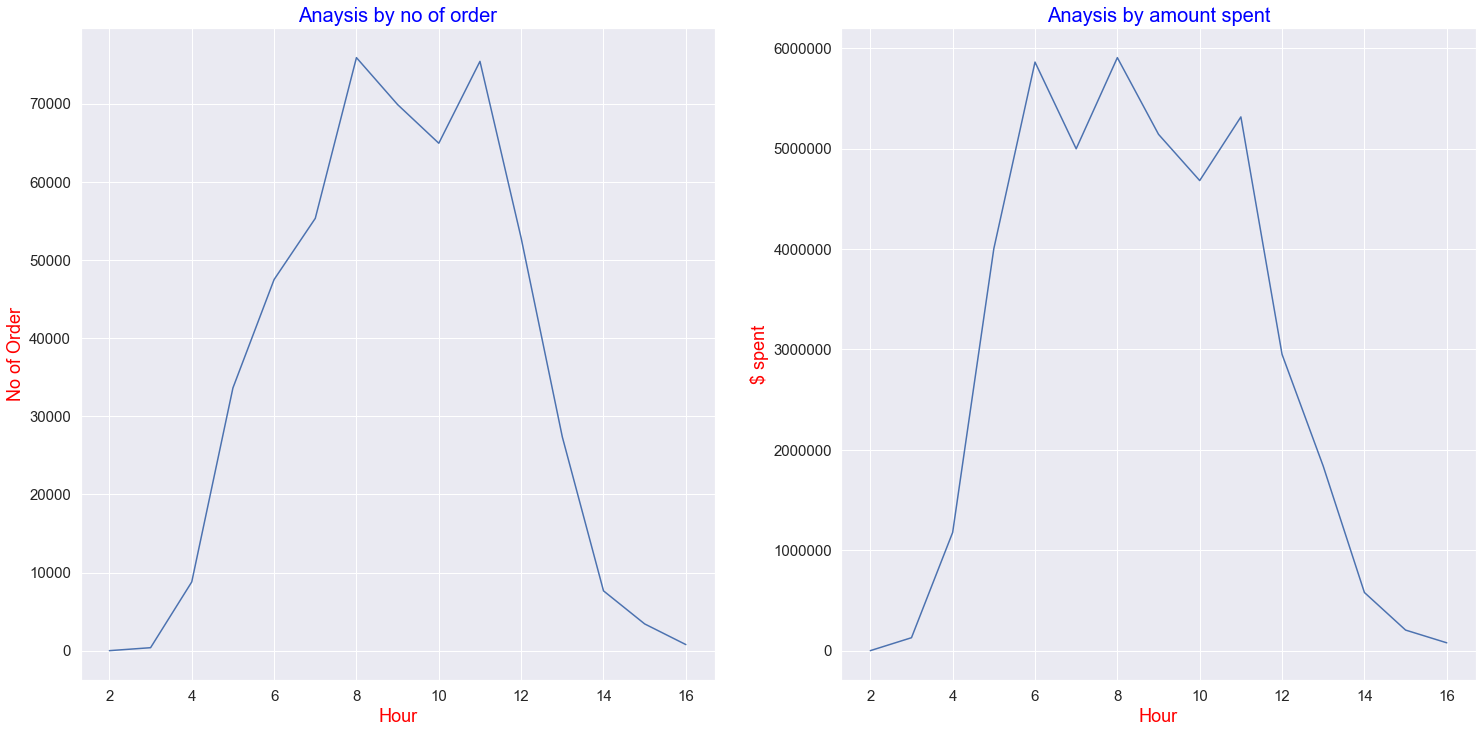

In [34]:
plt.figure(figsize=(25,12))
plt.subplot(1,2,1)
df.groupby("hour")["hour"].agg("count").plot(kind="line")
plt.title("Anaysis by no of order",fontsize=20,color="blue")
plt.ylabel("No of Order",fontsize=18,color="red")
plt.xlabel("Hour",fontsize=18,color="red")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
plt.title("Anaysis by amount spent",fontsize=20,color="blue")
df.groupby("hour")["Total_cost"].sum().plot(kind="line")
plt.ylabel("$ spent",fontsize=18,color="red")
plt.xlabel("Hour",fontsize=18,color="red")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### we can notice that whether its total spending or no of order its always high  between 6-12 hour of day

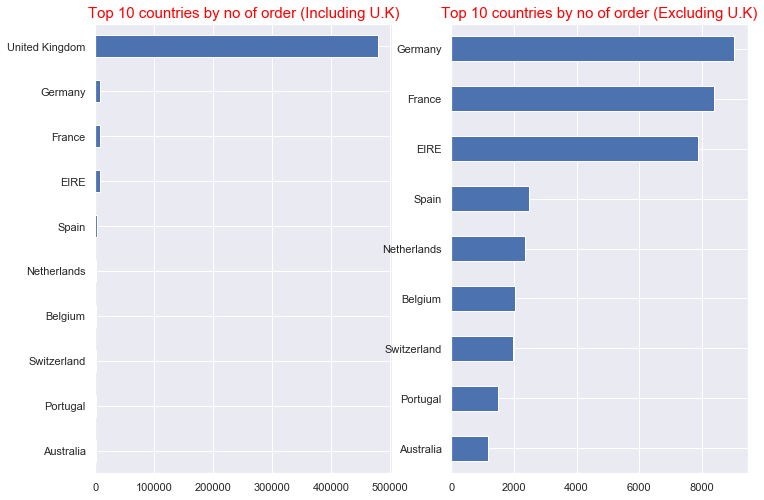

In [36]:

plt.subplot(1,2,1)
df["Country"].value_counts()[:10].sort_values(ascending=True).plot(kind="barh")
plt.title("Top 10 countries by no of order (Including U.K)",fontsize=15,color="red")
plt.subplot(1,2,2)
df["Country"].value_counts()[1:10].sort_values(ascending=True).plot(kind="barh")
plt.title("Top 10 countries by no of order (Excluding U.K)",fontsize=15,color="red")
plt.show()
### By seeing graph we clearing assume that this ecommerce data is of UK country having significant no of user in european countries

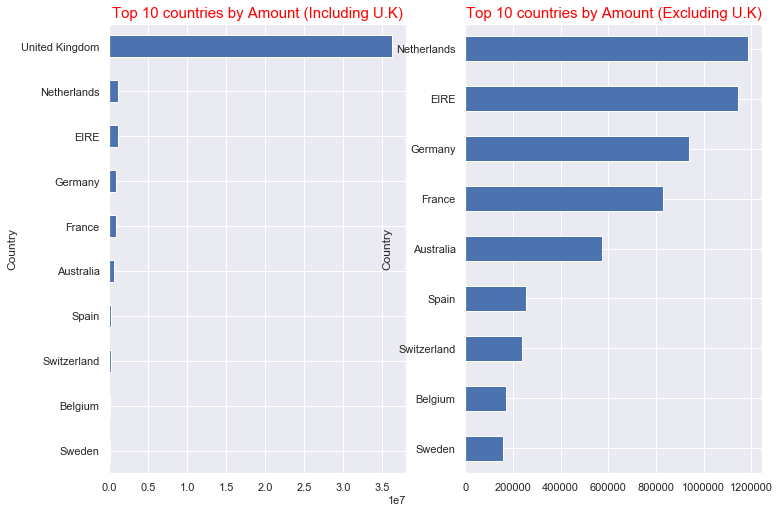

In [37]:

plt.subplot(1,2,1)
df.groupby("Country")["Total_cost"].sum().sort_values(ascending=False)[:10].sort_values(ascending=True).plot(kind="barh")
plt.title("Top 10 countries by Amount (Including U.K)",fontsize=15,color="red")

plt.subplot(1,2,2)
df.groupby("Country")["Total_cost"].sum().sort_values(ascending=False)[1:10].sort_values(ascending=True).plot(kind="barh")
plt.title("Top 10 countries by Amount (Excluding U.K)",fontsize=15,color="red")
plt.show()

### one things is very interesting that despite having large no of order from Germany and France(after U.K) ,highest spending 
### comes from Netherlands and Ireland.

In [44]:
df["UserId"].value_counts()
### we have roughly 4300 user (except -1 which show mainly unregistered user or any other things which is not mention in dataset) 

-1         131421
 374661      7665
 313131      5668
 296016      5095
 267708      4398
            ...  
 382893         1
 351498         1
 280686         1
 259266         1
 295890         1
Name: UserId, Length: 4335, dtype: int64

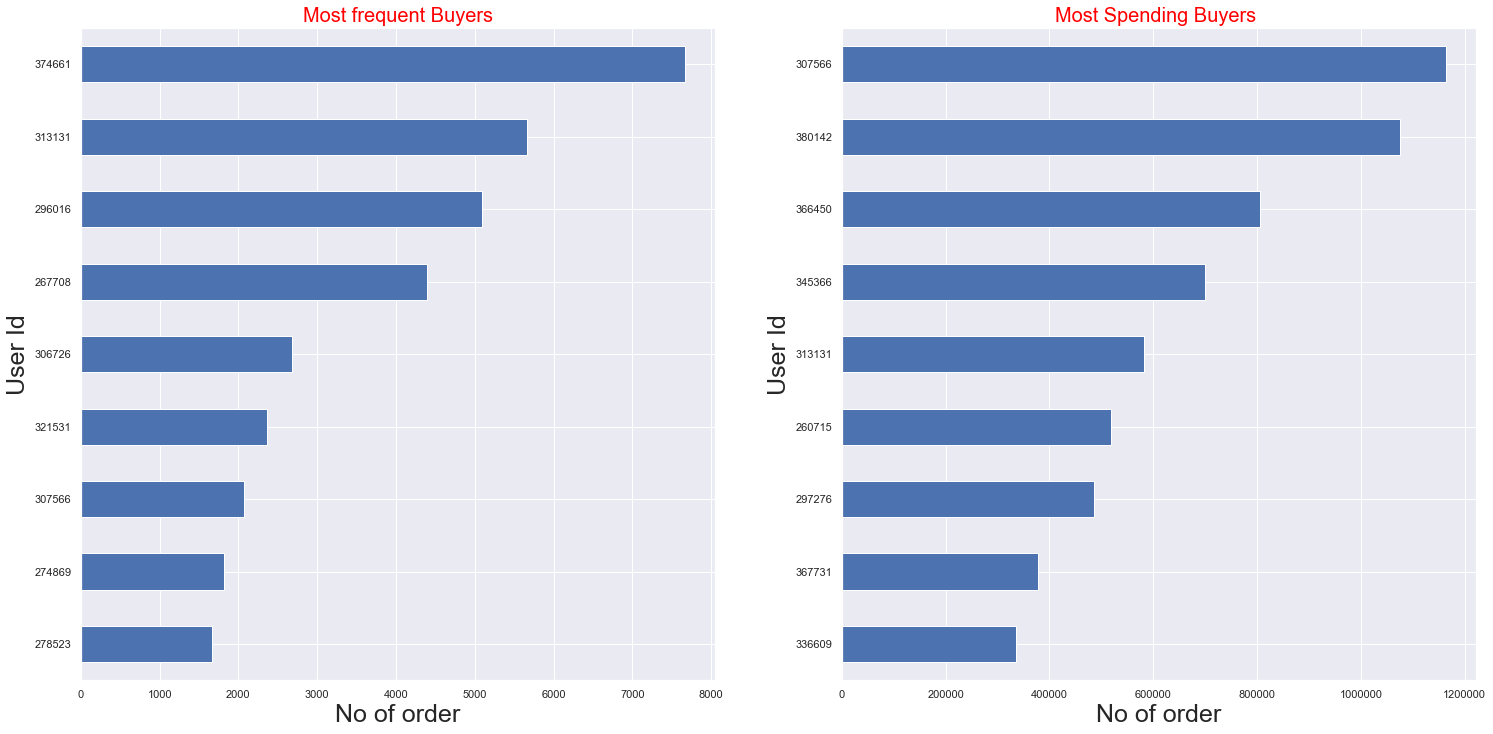

In [38]:
plt.figure(figsize=(25,12))
plt.subplot(1,2,1)
df["UserId"].value_counts()[1:10].sort_values(ascending=True).plot(kind="barh")
plt.title("Most frequent Buyers",fontsize=20,color="red")
plt.ylabel("User Id",fontsize=25)
plt.xlabel("No of order",fontsize=25)

plt.subplot(1,2,2)
df.groupby("UserId")["Total_cost"].sum().sort_values(ascending=False)[1:10].sort_values(ascending=True).plot(kind="barh")
plt.title("Most Spending Buyers ",fontsize=20,color="red")
plt.ylabel("User Id",fontsize=25)
plt.xlabel("No of order",fontsize=25)
plt.show()

###  Most selling product

In [39]:
### there is a catch ,if you notice there are total approx 3300 Itemcode

In [40]:
df["ItemCode"].value_counts()

1787079    3878
1787583    2320
998886     2167
470883     2007
1786029    1774
           ... 
1618659       1
1780233       1
786954        1
1789704       1
1787646       1
Name: ItemCode, Length: 3294, dtype: int64

In [41]:
### but problem is that Evey itemcode doesnot reflect single ItemDescription( or specific item) for example in case of 1787079
### there are 3  similar item (BUT DIFFERENT ItemDescription)
df[df["ItemCode"]==1787079]["ItemDescription"].value_counts()


JUMBO BAG RED RETROSPOT           2109
JUMBO  BAG BAROQUE BLACK WHITE     943
JUMBO BAG STRAWBERRY               826
Name: ItemDescription, dtype: int64

In [42]:
### now we create a fun to filterout ItemDescription of similar item(having same Itemcode)

In [43]:

def fun(Itemcode):
        x=df[(df["ItemCode"]==Itemcode)]["ItemDescription"].value_counts()
        for  key in data:
            if key==Itemcode:
                return data[key]
        else:
            i=0
            try:
                if len(x.index)==1:
                    data.update({Itemcode:x.index})
                    return x.index.values[0]
                else:
                    while i<len(x.index):
                        if i==0:
                           common = set(x.index[i].split()) & set(x.index[i+1].split())
                           common=" ".join(common)
                           i+=2
                        else:
                           common= set(common.split()) & set(x.index[i].split())
                           common=" ".join(common)
                        i+=1
                    data.update({Itemcode:common}) 
            except:
                  print(Itemcode)
            
            
            #print(len(data))
            return common
        
    
        

In [44]:
## checking the fun
data={}
fun(1787079)

'BAG JUMBO'

In [58]:
### Below code  can take some time(depend on which software you are running ,its take less time in google colab) 
### so i run this code on colab and importing data here


In [ ]:
#df["Filterd_ItemDescription"]=df["ItemCode"].apply(lambda x:fun(x))

In [50]:
new_df=pd.read_csv("out1.csv")

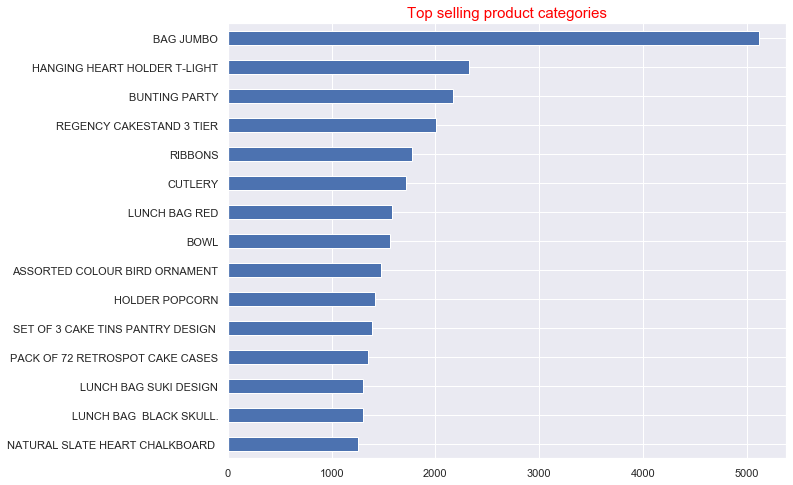

In [51]:
plt.figure(figsize=(10,8))
new_df["Filterd_ItemDescription"].value_counts()[:15].sort_values(ascending=True).plot(kind="barh")

plt.title("Top selling product categories",fontsize=15,color="red")
plt.show()

In [52]:
### if we did'nt filterout result would be different 

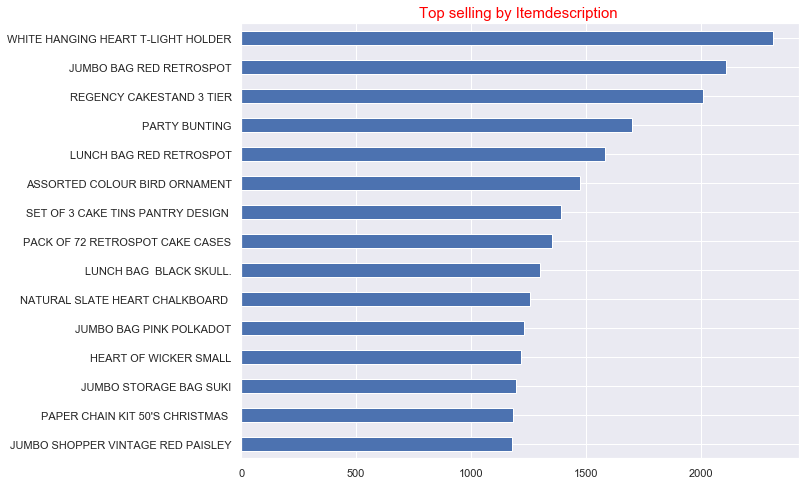

In [53]:
plt.figure(figsize=(10,8))
new_df["ItemDescription"].value_counts()[:15].sort_values(ascending=True).plot(kind="barh")
plt.title("Top selling by Itemdescription ",fontsize=15,color="red")
plt.show()

### Thank you